In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import modeule
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
#Importing the data
data=pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
#Filter data
left_emp=data[['satisfaction_level','last_evaluation']][data.left==1]

In [5]:
#Create group using K-means clustering
kmeans=KMeans(n_clusters=3,random_state=0).fit(left_emp)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
#Add new column "label" and assign cluster labels.
left_emp["label"]=kmeans.labels_

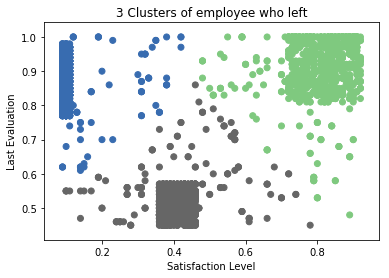

In [9]:
#Draw scatter plot
plt.scatter(left_emp["satisfaction_level"],left_emp["last_evaluation"], c=left_emp["label"], cmap="Accent")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.title("3 Clusters of employee who left")
plt.show()

In [10]:
#Building a Prediction Model
#Label encoding- naming string as a number
#Import LabelEncoding
from sklearn import preprocessing

In [11]:
#Creating labelencoder
le=preprocessing.LabelEncoder()

In [18]:
#Converting string labels into numbers
data["salary"]=le.fit_transform(data["salary"])
data["Departments "]=le.fit_transform(data["Departments "])

In [20]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Departments
0,0.38,0.53,2,157,3,0,1,0,7,1,7
1,0.80,0.86,5,262,6,0,1,0,7,2,7
2,0.11,0.88,7,272,4,0,1,0,7,2,7
3,0.72,0.87,5,223,5,0,1,0,7,1,7
4,0.37,0.52,2,159,3,0,1,0,7,1,7


In [23]:
#Splitting data into feature
x=data[["satisfaction_level","last_evaluation","number_project",
        "average_montly_hours","time_spend_company","Work_accident",
        "promotion_last_5years","Departments ","salary"]]
y=data["left"]

In [24]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

In [28]:
#split dataset into training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) #70% train and 30% test

In [30]:
x_train.head()
y_train.head()

12602    1
4889     0
1572     1
13375    0
879      1
Name: left, dtype: int64

In [36]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb=GradientBoostingClassifier()

#Train the model using the training set
gb.fit(x_train,y_train)

#Predict the response for the test dataset
y_pred=gb.predict(x_test)

In [38]:
#Importing the data
good=pd.read_csv('testcase.csv')
good

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.58,0.74,4,215,3,0,0,7,1


In [39]:
y_pred=gb.predict(good)

In [40]:
print(y_pred)

[1 1 0]


In [41]:
df=pd.DataFrame(y_pred)
df.head()

,0
0,1
1,1
2,0
